In [365]:
# Imports
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn


In [366]:
# Import data
df = pd.read_csv('data/train.csv')
# Reduce dataframe the number of lines by half
df = df.sample(frac=0.1)

In [367]:
# Histogram of the column 'browser'
fig = px.histogram(df, x='browser').update_xaxes(categoryorder="total descending")
fig.show()

In [368]:
# Histogram of the column 'country'
fig = px.histogram(df, x='country').update_xaxes(categoryorder="total descending")
fig.show()

In [369]:
# Convert country code 'UK' to 'GB'
df['country'] = df['country'].replace('UK', 'GB')

In [370]:
# Function that returns 'other' if the country is not in the list: ['US', 'GB', 'ES', 'FR', 'DE', 'IT', 'CH', 'AU', 'MX', 'BR', 'CA', 'JP']
def country_other(country):
    if country not in ['US', 'GB', 'ES', 'FR', 'DE', 'IT', 'AU', 'MX', 'BR', 'CA', 'JP']:
        return 'other'
    else:
        return country

# Apply the function to the column 'country'
df['country'] = df['country'].apply(country_other)

# Show unique values in the column 'country'
df.country.unique()

array(['FR', 'US', 'other', 'AU', 'DE', 'BR', 'GB', 'ES', 'IT', 'CA',
       'MX', 'JP'], dtype=object)

In [371]:
# Function that converts the timestamp to a datetime object
def convert_timestamp(timestamp):
    date = pd.to_datetime(timestamp, unit='s')
    # extract the hour from the timestamp
    hour = date.hour
    return hour

In [372]:
# Convert the timestamp to a datetime object
df['time'] = df['timeStamp'].apply(convert_timestamp)

In [373]:
# For each country, create a individual datatframe with the mean of the sold ads for each hour
# Get all individual country
country_list = df.country.unique()

# Concatenate time and country columns to create a new dataframe
df['time_country'] = df['country'].astype(str) + '_' + df['time'].astype(str)

# Show the first 5 rows of the dataframe
df.head()

,auctionId,timeStamp,placementId,websiteId,hashedRefererDeepThree,country,opeartingSystem,browser,browserVersion,device,environmentType,integrationType,articleSafenessCategorization,isSold,time,time_country
844938,60ae4784-9698-460d-ba38-64e0b6272b19,1603715349,69897,38954,f7ec1b6c791b804738d0269801f9a2c7b4a9905595839f...,FR,iOS,Safari mobile,NaN,Phone,sdk-inapp,1,safe,True,12,FR_12
629029,3dbf50f5-8a38-4090-b657-d2a6d9f8e1d2_e9bef620-...,1604013617,108222,61885,ef7d7f01d6c83b6271c757d39c58fbcf213e30494ab062...,US,Android,Chrome Mobile,79_0,Phone,js-web,2,safe,True,23,US_23
505636,83c56201-2231-4334-bb9a-30d9322ca1a1_eef61c69-...,1604081830,131286,20808,d387e1055d292da826bc85edcff845fee2480cd200c8f1...,other,macOS,Chrome,86_0,PC,js-web,2,unsafe,False,18,other_18
629427,541a6f22-5e20-4506-b4f0-8f04b1e2463b_819c2629-...,1603895770,117842,50535,32efbd58f3b6714462ab5c06d4823ee55d0cf5e3ad4e4e...,US,Windows,Firefox,82_0,PC,js-web,2,safe,False,14,US_14
956043,6731d4b4-6d29-4d9f-9669-96dd722a0eb5_b810da42-...,1604002637,130702,73354,8871176b43f4336682874466d88187e3f4a247971c1e7b...,US,iOS,Facebook App,NaN,Phone,js-web,2,safe,True,20,US_20


In [374]:
df['opeartingSystem'] = df['opeartingSystem'].str.replace('macOS','Mac OS')

df['opeartingSystem'] = df['opeartingSystem'].str.replace('OS X','Mac OS')

In [375]:
# get timezone for each country
from datetime import datetime, tzinfo
from dateutil import tz
import pytz
# Create a function that returns the local time for a gevin country
def get_local_time(country, time):
    dt_str = pd.to_datetime(time, unit='s').strftime('%m/%d/%Y %H:%M:%S')
    format = "%m/%d/%Y %H:%M:%S"
    # Create datetime object in local timezone
    dt = datetime.strptime(dt_str, format)
    # Create datetime object in UTC timezone
    dt_utc = dt.replace(tzinfo=pytz.UTC)
    # Create datetime object in country timezone
    try:
        country_tz = pytz.country_timezones(country)[0]
        dt_country = dt_utc.astimezone(pytz.timezone(country_tz))
        return dt_country.strftime('%H')
    except:
        return pd.NaT


In [376]:
# Create a new column with the local time for each country
# df['local_time'] = df.apply(lambda row: get_local_time(row['country'], row['timeStamp']), axis=1)


In [377]:
# Function that returns 'neutral' if the value is between 02 and 08
def neutral(hour):
    if hour == '02':
        return 'neutral'
    elif hour == '03':
        return 'neutral'
    elif hour == '04':
        return 'neutral'
    elif hour == '05':
        return 'neutral'
    elif hour == '06':
        return 'neutral'
    elif hour == '07':
        return 'neutral'    
    elif hour == '08':
        return 'neutral'
    else:
        return hour

        # Apply the function to the column 'local_time'
#df['local_time'] = df['local_time'].apply(neutral)

        # Function that returns 'bad' if the value is between 18 and 23


def bad(hour):
    if hour == '18':
        return 'bad'
    elif hour == '19':
        return 'neutral'
    elif hour == '20':
        return 'neutral'
    elif hour == '21':
        return 'neutral'
    elif hour == '22':
        return 'neutral'
    elif hour == '23':
        return 'bad'
    else:
        return hour

# Apply the function to the column 'local_time'
#df['local_time'] = df['local_time'].apply(bad)


In [378]:
# function that converts number to text
def convert_number(number):
    if number == 1:
        return 'one'
    elif number == 2:
        return 'two'
    else:
        return 'other'

# Apply the function to the column 'integrationType'
df['integrationType'] = df['integrationType'].apply(convert_number)

In [379]:
count_websiteId = df['websiteId'].value_counts()

count_websiteId.sort_values(ascending=False)

top_websiteId = count_websiteId.index[:11]

top_websiteId=top_websiteId.tolist()

def prefix(list, prefix):

    rename_list= list
    for i in range(len((list))):

        rename_list[i]= prefix + str(list[i])
    return rename_list

top_websiteId_prefix = prefix(top_websiteId, 'websiteId_')
df['websiteId'] = df['websiteId'].apply(lambda x: 'websiteId_' + str(x) if 'websiteId_' + str(x) in top_websiteId_prefix else 'other_websiteId')

In [380]:
# count the number of each countries in the dataframe

count_browser = df['browser'].value_counts()
count_browser.sort_values(ascending=False)
top_browser = count_browser.index[:11]

df['browser'] = df['browser'].apply(lambda x: x if x in top_browser else 'other_browser')

In [381]:
# définir ceux qui apparaissent le plus

count_placementId = df['placementId'].value_counts()
count_placementId
# keep 10 bests

best_placementId = count_placementId[:10]

# print(best_placementId)

best_placementId_index = best_placementId.index.tolist()

# print(best_placementId_index)
# rename

prefixPId = 'PId_'

#PId_renames = [(prefixPId + sub) for sub in best_placementId_index]

def rename(list, prefix):

    rename_list = list

    for i in range(len((list))):

        rename_list[i] = prefix + str(list[i])

    return rename_list


Pid_rename = rename(best_placementId_index, prefixPId)
# send back data

df2 = pd.DataFrame()

df2['placementId'] = df['placementId'].apply(
    lambda x: prefixPId + str(x) if prefixPId + str(x) in Pid_rename else 'PId_Other')


In [382]:
# définir ceux qui apparaissent le plus

count_deepthree = df['hashedRefererDeepThree'].value_counts()

count_deepthree


# keep 10 bests

best_deepthree = count_deepthree[:10]

# print(best_placementId)

best_deepthree_index = best_deepthree.index.tolist()

print(best_placementId_index)


# rename

prefixdeepthree = 'deepthree_'

#PId_renames = [(prefixPId + sub) for sub in best_placementId_index]


def rename(list, prefix):

    rename_list = list

    for i in range(len((list))):

        rename_list[i] = prefix + str(list[i])

    return rename_list


deepthree_rename = rename(best_deepthree_index, prefixdeepthree)


# send back data

df3 = pd.DataFrame()

df3['hashedRefererDeepThree'] = df['hashedRefererDeepThree'].apply(
    lambda x: prefixdeepthree + str(x) if prefixdeepthree + str(x) in deepthree_rename else 'deepthree_Other')


['PId_121842', 'PId_121840', 'PId_121836', 'PId_108383', 'PId_117831', 'PId_91837', 'PId_123180', 'PId_121895', 'PId_129333', 'PId_112035']


In [383]:
# get_dumy for the column 'local_time'
df_dumy_time = pd.get_dummies(df['time_country'])
# add get_dumy for the column 'device'
df_dumy_device = pd.get_dummies(df['device'])
# add get_dumy for the column 'integraionType' and change the name of the columns
df_dumy_integrationType = pd.get_dummies(df['integrationType'])
# add get_dumy for the column 'articleSafenessCategorization'
df_dumy_articleSafenessCategorization = pd.get_dummies(df['articleSafenessCategorization'])
# add get_dumy for the column 'opeartingSystem'
df_dumy_opeartingSystem = pd.get_dummies(df['opeartingSystem'])
# add get_dumy for the column 'environmentType'
df_dumy_environmentType = pd.get_dummies(df['environmentType'])
# add get_dumy for the column 'websiteId'
df_dumy_websiteId = pd.get_dummies(df['websiteId'])
# add get_dumy for the column 'browser'
df_dumy_browser = pd.get_dummies(df['browser'])
# add get_dumy for the column 'placementId'
df_dumy_placementId = pd.get_dummies(df2['placementId'])
# add get_dumy for the column 'hashedRefererDeepThree'
df_dumy_hashedRefererDeepThree = pd.get_dummies(df3['hashedRefererDeepThree'])
# add get_dumy for the column 'country'
df_dumy_country = pd.get_dummies(df['country'])


# Concatenate all the dataframes
df_dumy = pd.concat([
    #df_dumy_time,
    df_dumy_device,
    df_dumy_integrationType,
    df_dumy_articleSafenessCategorization,
    df_dumy_opeartingSystem,
    df_dumy_environmentType,
    df_dumy_websiteId,
    df_dumy_browser,
    df_dumy_placementId,
    df_dumy_hashedRefererDeepThree,
    df_dumy_country
    ], axis=1)


In [384]:
# Show the first 5 rows of the dataframe
df_dumy

,IPTV,PC,Phone,Tablet,one,two,safe,uncat,unsafe,Android,...,CA,DE,ES,FR,GB,IT,JP,MX,US,other
844938,0,0,1,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
629029,0,0,1,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
505636,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
629427,0,1,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
956043,0,0,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148702,0,1,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
750394,0,0,1,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
408103,0,0,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
746726,0,0,1,0,0,1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [385]:
# Make a prediction model based on the data
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df_dumy, df['isSold'], test_size=0.2, random_state=42)
    

In [386]:
# Fit the model with multithreading
model = RandomForestClassifier(n_jobs=-1)
model.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [387]:
# compute the score
model.score(X_test, y_test)

0.6934925311417791

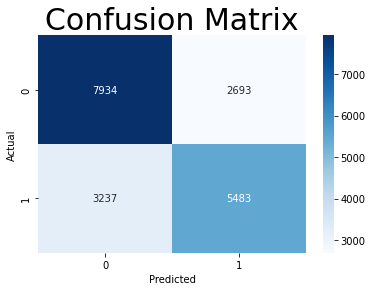

In [388]:
from sklearn.metrics import confusion_matrix
# Compute the confusion matrix

# Compute confusion matrix
confusion = confusion_matrix(y_test, model.predict(X_test))
# Plot confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', ax=ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix', fontsize=30)
plt.show()

In [389]:
# Compute the report
from sklearn.metrics import classification_report
# Compute the classification report
report = classification_report(y_test, model.predict(X_test))
print(report)

              precision    recall  f1-score   support

       False       0.71      0.75      0.73     10627
        True       0.67      0.63      0.65      8720

    accuracy                           0.69     19347
   macro avg       0.69      0.69      0.69     19347
weighted avg       0.69      0.69      0.69     19347



In [390]:
# Do the same with logistic regression
from sklearn.linear_model import LogisticRegression
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df_dumy, df['isSold'], test_size=0.2, random_state=42)
    

In [391]:
# Fit the model with multithreading
model = LogisticRegression(n_jobs=-1)
model.fit(X_train, y_train)

/home/zakenobi/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(n_jobs=-1)

In [392]:
# compute the score
model.score(X_test, y_test)

0.6756603090918488

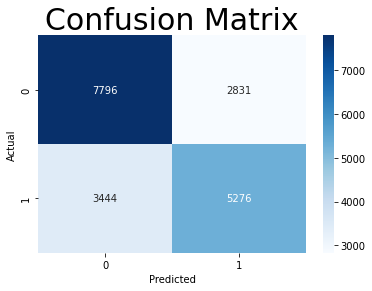

In [393]:
# Compute the confusion matrix
confusion = confusion_matrix(y_test, model.predict(X_test))
# Plot confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', ax=ax)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix', fontsize=30)
plt.show()

In [394]:
# Compute the report
from sklearn.metrics import classification_report
# Compute the classification report
report = classification_report(y_test, model.predict(X_test))
print(report)

              precision    recall  f1-score   support

       False       0.69      0.73      0.71     10627
        True       0.65      0.61      0.63      8720

    accuracy                           0.68     19347
   macro avg       0.67      0.67      0.67     19347
weighted avg       0.67      0.68      0.67     19347

